In [1]:
!pip install tensorflow



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Load and Preprocess the Data

In [2]:
# Load the dataset
file_path = 'transformed_rainfall_data.csv'
data = pd.read_csv(file_path)

# Skip the first two rows (Latitude and Longitude)
data = data.iloc[2:].reset_index(drop=True)

# Rename columns to avoid confusion
data.columns = ['Date', 'Vavuniya', 'Anuradhapura', 'Maha Illuppallama']

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Create lag features
for lag in range(1, 8):  # 7-day lag features
    data[f'Vavuniya_lag_{lag}'] = data['Vavuniya'].shift(lag)
    data[f'Anuradhapura_lag_{lag}'] = data['Anuradhapura'].shift(lag)
    data[f'Maha_Illuppallama_lag_{lag}'] = data['Maha Illuppallama'].shift(lag)

# Drop rows with NaN values (due to lagging)
data.dropna(inplace=True)

# Define the features (X) and target (y)
features = [col for col in data.columns if 'lag' in col]
X = data[features]
y = data[['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']]

# Display the first few rows of the preprocessed data
print(data.head())


            Vavuniya  Anuradhapura  Maha Illuppallama  Vavuniya_lag_1  \
Date                                                                    
2021-01-08      16.4           0.1                8.3             0.0   
2021-01-09      14.2          11.1               39.2            16.4   
2021-01-10      31.5          25.7               27.8            14.2   
2021-01-11      77.1          16.5               13.0            31.5   
2021-01-12      15.4           7.7                3.4            77.1   

            Anuradhapura_lag_1  Maha_Illuppallama_lag_1  Vavuniya_lag_2  \
Date                                                                      
2021-01-08                 0.0                      0.0            34.4   
2021-01-09                 0.1                      8.3             0.0   
2021-01-10                11.1                     39.2            16.4   
2021-01-11                25.7                     27.8            14.2   
2021-01-12                16.5        

Split the Data

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display the shapes of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (845, 21)
X_test shape: (212, 21)
y_train shape: (845, 3)
y_test shape: (212, 3)


Define the Neural Network Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Define the neural network model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Specify input shape using Input layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1]))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')


Train the Model

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 204.4098 - val_loss: 257.1409
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 152.0455 - val_loss: 255.1093
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115.5401 - val_loss: 259.1779
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128.5094 - val_loss: 258.8676
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 113.7291 - val_loss: 263.7396
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.6819 - val_loss: 267.3053
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.0304 - val_loss: 276.7630
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.3923 - val_loss: 273.0142
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.6802 - val_loss: 277.1180
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.5541 - val_loss: 274.6772
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.0583 - val_loss: 279.5635
Epoch 12/100
22/22 ━━━━

Make Predictions and Evaluate the Model

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error: 370.73638426747016
Mean Absolute Error: 8.23223198600254


Plot the Results

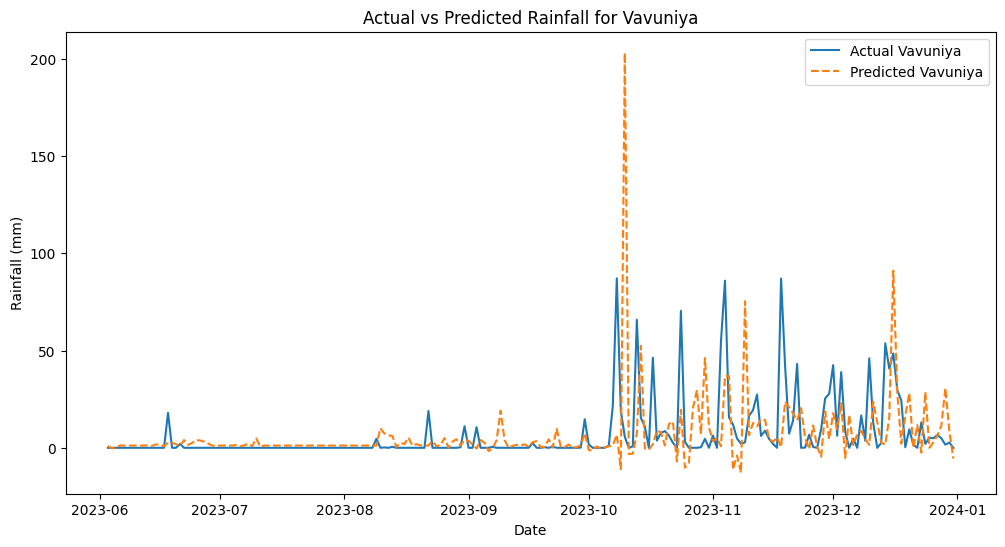

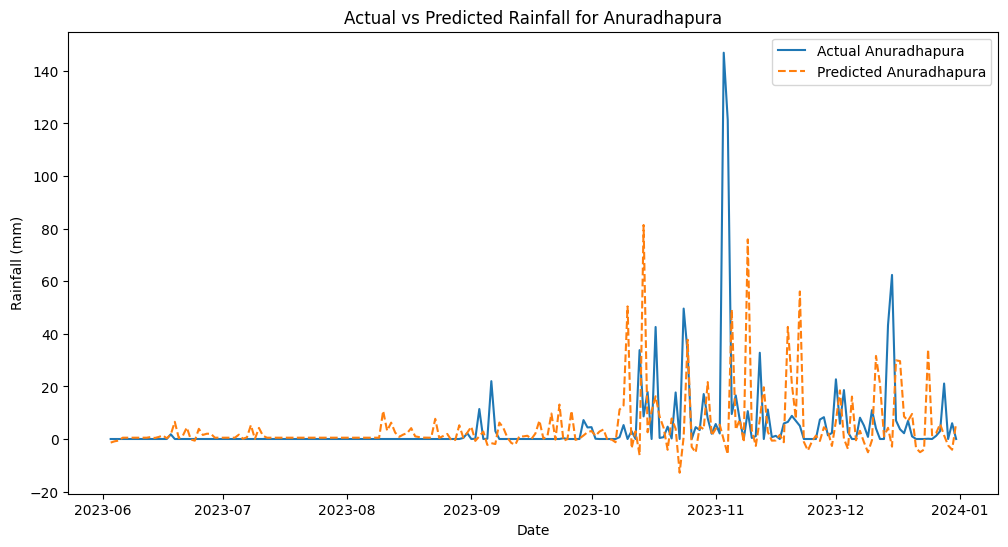

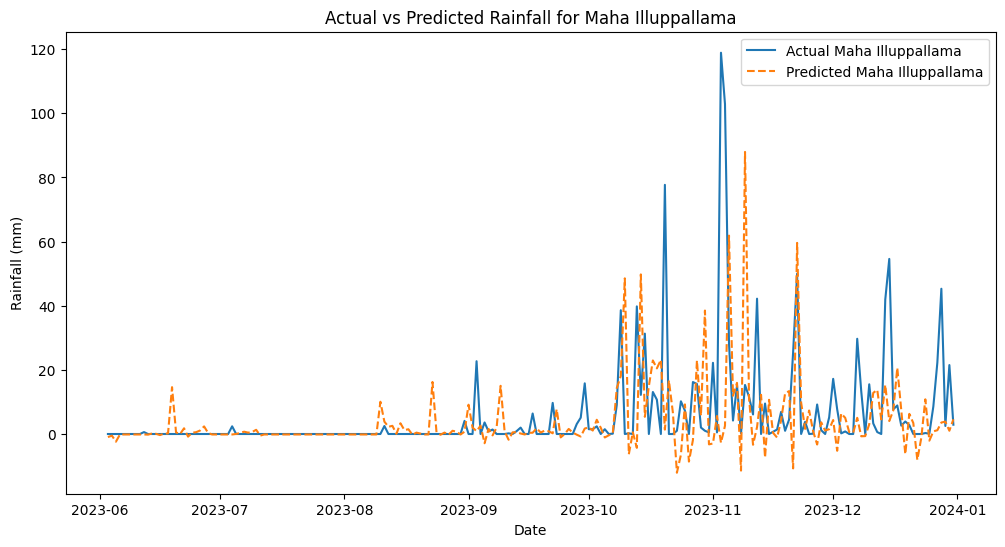

In [8]:
# Plot the actual vs predicted values for Vavuniya
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test['Vavuniya'], label='Actual Vavuniya')
plt.plot(y_test.index, y_pred[:, 0], label='Predicted Vavuniya', linestyle='--')
plt.title('Actual vs Predicted Rainfall for Vavuniya')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

# Plot the actual vs predicted values for Anuradhapura
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test['Anuradhapura'], label='Actual Anuradhapura')
plt.plot(y_test.index, y_pred[:, 1], label='Predicted Anuradhapura', linestyle='--')
plt.title('Actual vs Predicted Rainfall for Anuradhapura')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

# Plot the actual vs predicted values for Maha Illuppallama
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test['Maha Illuppallama'], label='Actual Maha Illuppallama')
plt.plot(y_test.index, y_pred[:, 2], label='Predicted Maha Illuppallama', linestyle='--')
plt.title('Actual vs Predicted Rainfall for Maha Illuppallama')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


Compare Actual vs Predicted Values

In [9]:
# Convert the predictions to a DataFrame for easier comparison
y_pred_df = pd.DataFrame(y_pred, columns=['Vavuniya', 'Anuradhapura', 'Maha Illuppallama'], index=y_test.index)

# Concatenate the actual and predicted values for comparison
comparison_df = pd.concat([y_test, y_pred_df], axis=1)
comparison_df.columns = ['Actual Vavuniya', 'Actual Anuradhapura', 'Actual Maha Illuppallama', 
                         'Predicted Vavuniya', 'Predicted Anuradhapura', 'Predicted Maha Illuppallama']

# Print the first 10 rows of the comparison DataFrame
print(comparison_df.head(10))


            Actual Vavuniya  Actual Anuradhapura  Actual Maha Illuppallama  \
Date                                                                         
2023-06-03              0.0                  0.0                       0.0   
2023-06-04              0.0                  0.0                       0.0   
2023-06-05              0.0                  0.0                       0.0   
2023-06-06              0.0                  0.0                       0.0   
2023-06-07              0.0                  0.0                       0.0   
2023-06-08              0.0                  0.0                       0.0   
2023-06-09              0.0                  0.0                       0.0   
2023-06-10              0.0                  0.0                       0.0   
2023-06-11              0.0                  0.0                       0.0   
2023-06-12              0.0                  0.0                       0.6   

            Predicted Vavuniya  Predicted Anuradhapura  \
Date 